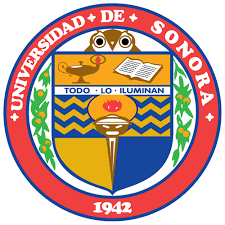



# **Evaluación I**

*Análisis de Series de Tiempo*

Iveth Rocio Navarro Lopez



---

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import acf, pacf 

**Parte 1**


---



In [36]:
#En esta parte de la evaluación, se transformará una serie de tiempo de una base
#de datos de The South Pole Observatory (SPO), en una serie de tiempo de las 
#concentraciones de CO2. En otras palabras, esta parte es para la construcción
#de la serie de tiempo.

#Data Frame de la base de datos y una copia para trabajar
url = "https://raw.githubusercontent.com/carloslizarragac/FisicaComputacional1/master/Eval1/data/co2_spo_DailyData.txt"
Encabezados=['site_code', 'year', 'month', 'day', 'hour', 'minute', 'second', 'time_decimal', 'value', 'value_std_dev', 'nvalue', 'latitude', 'longitude', 'altitude', 'elevation', 'intake_height', 'qcflag'] #Encabezados de las columnas, de acuerdo al archivo que se leera
df_CO2 = pd.read_csv(url, names=Encabezados, encoding='cp1251', sep='\s+', header=None, skiprows=151, skipfooter=0, engine='python')
print(df_CO2.head())
print(df_CO2.info())
print(df_CO2.shape)

df_0CO2=df_CO2.copy() 

df_0CO2["Date"] = df_0CO2['day'].astype(str) + '/' + df_0CO2["month"].astype(str) + '/' + df_0CO2["year"].astype(str)

print(df_0CO2.head())
print(df_0CO2.tail())


#Formato de fecha:
df_0CO2['Date']=pd.to_datetime(df_0CO2['Date'], dayfirst=True).copy()
df_0CO2['value'].astype(float)
df_0CO2['value']=pd.to_numeric(df_0CO2['value'], errors='coerce')
df_0CO2.info()

df_0CO2=df_0CO2.set_index('Date')

df_1CO2=df_0CO2.copy()
print(df_1CO2)

#Eliminar valores nulos
df_1CO2=df_1CO2.replace(to_replace=-999.99, value=' ', regex=True) 
df_1CO2['value']=pd.to_numeric(df_1CO2['value'], errors='coerce')
df_2CO2=df_1CO2.ffill().bfill()

ts_test=df_2CO2['value'].copy()

ts_test


  site_code  year  month  day  ...  altitude  elevation  intake_height  qcflag
0       SPO  1975      1    1  ...    2820.0     2810.0           10.0     *..
1       SPO  1975      1    2  ...    2820.0     2810.0           10.0     *..
2       SPO  1975      1    3  ...    2820.0     2810.0           10.0     *..
3       SPO  1975      1    4  ...    2820.0     2810.0           10.0     *..
4       SPO  1975      1    5  ...    2820.0     2810.0           10.0     *..

[5 rows x 17 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site_code      16436 non-null  object 
 1   year           16436 non-null  int64  
 2   month          16436 non-null  int64  
 3   day            16436 non-null  int64  
 4   hour           16436 non-null  int64  
 5   minute         16436 non-null  int64  
 6   second         16436 non-null  int64 

Date
1975-01-01    328.23
1975-01-02    328.23
1975-01-03    328.23
1975-01-04    328.23
1975-01-05    328.23
               ...  
2019-12-27    409.06
2019-12-28    409.00
2019-12-29    408.70
2019-12-30    408.41
2019-12-31    408.57
Name: value, Length: 16436, dtype: float64

**Parte 2**


---



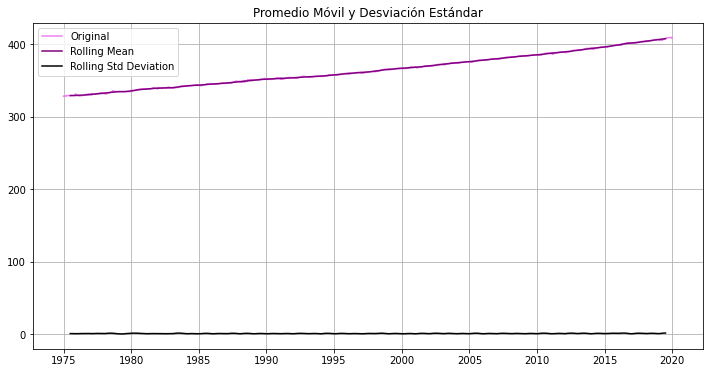

Prueba de Dickey-Fuller:
Test Statistic                     1.221304
p-value                            0.996130
#Lags Used                        42.000000
Number of Observations Used    16393.000000
Critical Value (1%)               -3.430749
Critical Value (5%)               -2.861716
Critical Value (10%)              -2.566864
dtype: float64


In [37]:
#Una vez construida la serie de tiempo, esta parte puede dedicarse enteramente
#al análisis de la misma.

#Función de prueba de estacionalidad
def test_stationarity(df_ts): 

#Estadística de promedios móviles
     rolmean = df_ts.rolling(window=365, center=True).mean()
     rolstd = df_ts.rolling(window=365, center=True).std()

#Tamaño de la figura
     plt.rcParams["figure.figsize"] = (12,6)

#Gráfica de la Estadística de promedios móviles
     plt.plot(df_ts, color='violet',label='Original')
     plt.plot(rolmean, color='purple', label='Rolling Mean')
     plt.plot(rolstd, color='black', label = 'Rolling Std Deviation')
     plt.legend(loc='best')
     plt.title('Promedio Móvil y Desviación Estándar')
     plt.grid()
     plt.show()

#Prueba Aumentada de Dickey-Fuller:
     print('Prueba de Dickey-Fuller:')
     dftest = adfuller(df_ts, autolag='AIC')
     dfoutput = pd.Series(dftest[0:4],
          index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
     for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value

     print(dfoutput)

test_stationarity(ts_test)

Observación: Como p>0.05, se aplicarán métodos en el intento por disminuirlo.

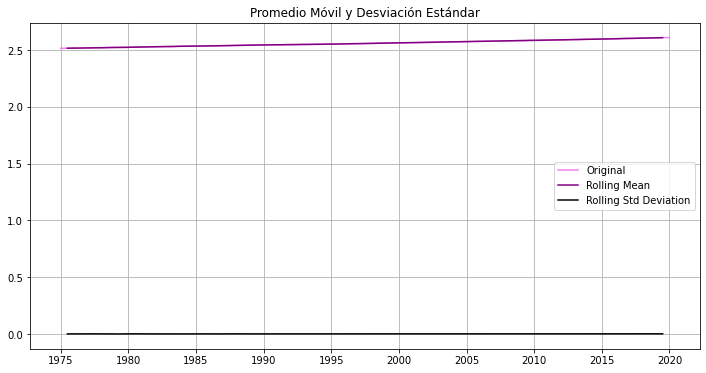

Prueba de Dickey-Fuller:
Test Statistic                     0.667707
p-value                            0.989171
#Lags Used                        42.000000
Number of Observations Used    16393.000000
Critical Value (1%)               -3.430749
Critical Value (5%)               -2.861716
Critical Value (10%)              -2.566864
dtype: float64


In [38]:
#Escala logarítmica
ts_logtest=np.log10(ts_test)
test_stationarity(ts_logtest)

Observación: Se aplicará una descomposiciónde serie para intentar reducir la variación del valor promedio y la desviación estándar.

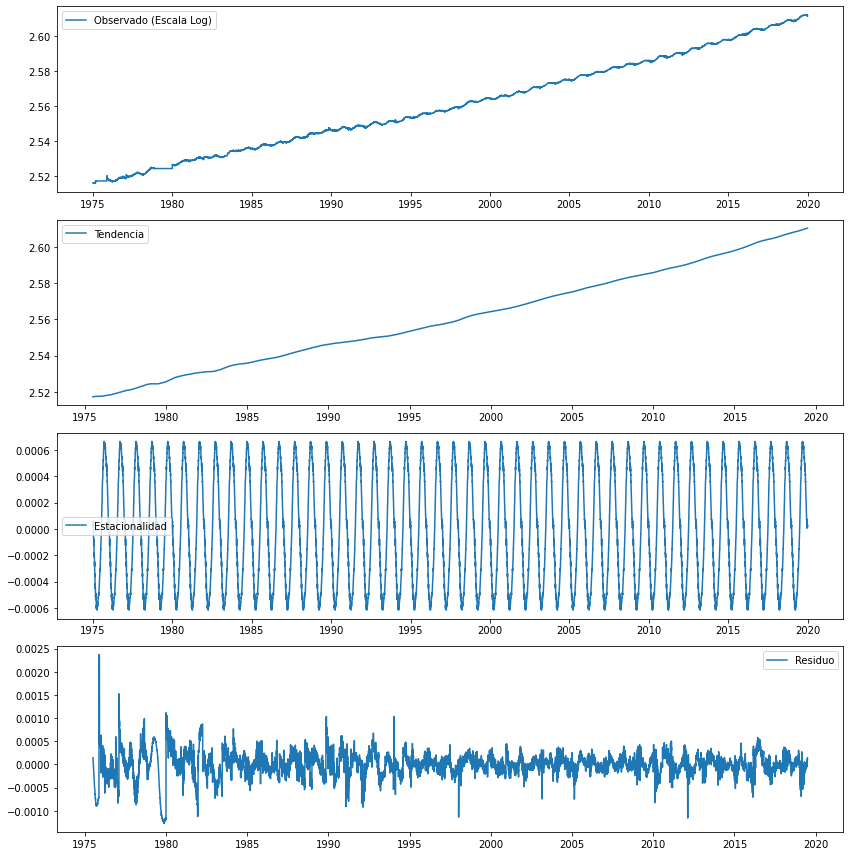

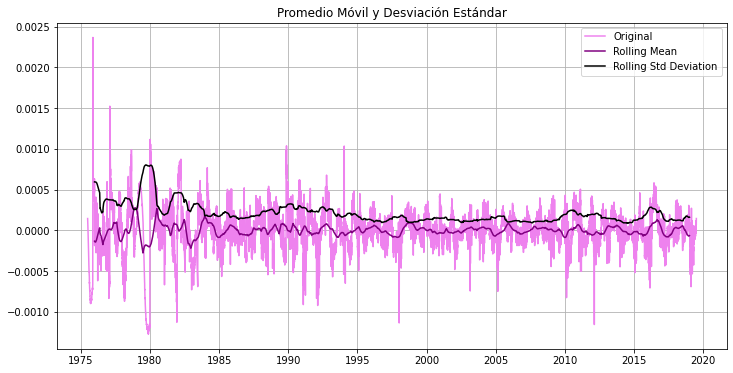

Prueba de Dickey-Fuller:
Test Statistic                -1.145540e+01
p-value                        5.723039e-21
#Lags Used                     2.800000e+01
Number of Observations Used    1.604300e+04
Critical Value (1%)           -3.430758e+00
Critical Value (5%)           -2.861720e+00
Critical Value (10%)          -2.566866e+00
dtype: float64


In [39]:
dTSlogtest= sm.tsa.seasonal_decompose(ts_logtest.interpolate(), model='additive', freq=365)

trend = dTSlogtest.trend
seasonal = dTSlogtest.seasonal
residue = dTSlogtest.resid

#Gráfica de las componentes
plt.rcParams["figure.figsize"] = (12,12)
plt.subplot(411)
plt.plot(ts_logtest, label='Observado (Escala Log)')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residue, label='Residuo')
plt.legend(loc='best')

plt.tight_layout();
plt.show()

#Test de residuo
ts_rlogtest=residue
ts_rlogtest.dropna(inplace=True)
test_stationarity(ts_rlogtest)

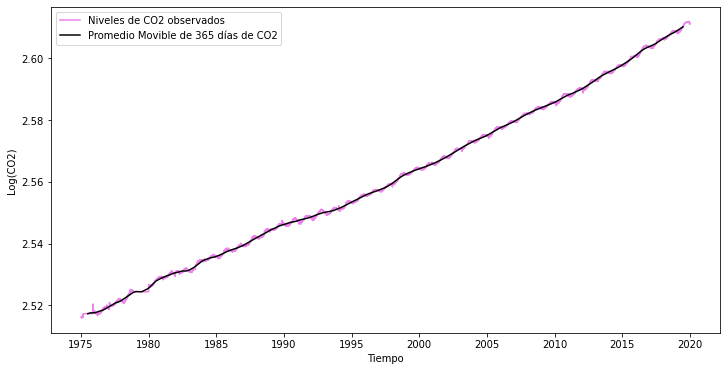

In [40]:
#Promedio móvil de 365 días de ts_logtest y contraste con ts_test_log

plt.plot(ts_logtest,color='violet',label='Niveles de CO2 observados')
plt.plot(ts_logtest365,color='black', label='Promedio Movible de 365 días de CO2')

plt.xlabel('Tiempo')
plt.ylabel('Log(CO2)')
plt.legend()
plt.show()

Date
1975-01-01    0.000013
1975-01-02    0.000013
1975-01-03    0.000013
1975-01-04    0.000013
1975-01-05    0.000013
                ...   
2019-12-27    0.000128
2019-12-28    0.000128
2019-12-29    0.000128
2019-12-30    0.000128
2019-12-31    0.000128
Name: value, Length: 16436, dtype: float64


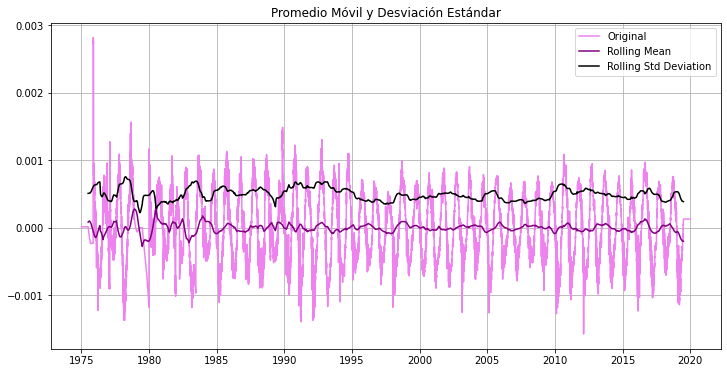

Prueba de Dickey-Fuller:
Test Statistic                -1.143969e+01
p-value                        6.222451e-21
#Lags Used                     4.300000e+01
Number of Observations Used    1.639200e+04
Critical Value (1%)           -3.430749e+00
Critical Value (5%)           -2.861716e+00
Critical Value (10%)          -2.566864e+00
dtype: float64


In [41]:
#Restando el promedio movible de 365 días
ts_logtest365=ts_logtest.rolling(365, center=True).mean()
ts_dlogtest=ts_logtest-ts_logtest365
ts_dlogtest=ts_dlogtest.ffill().bfill()
print(ts_dlogtest)

test_stationarity(ts_dlogtest)

Date
1975-01-01         NaN
1975-01-02         NaN
1975-01-03         NaN
1975-01-04         NaN
1975-01-05         NaN
1975-01-06         NaN
1975-01-07         NaN
1975-01-08    2.516178
1975-01-09    2.516178
1975-01-10    2.516178
Name: value, dtype: float64


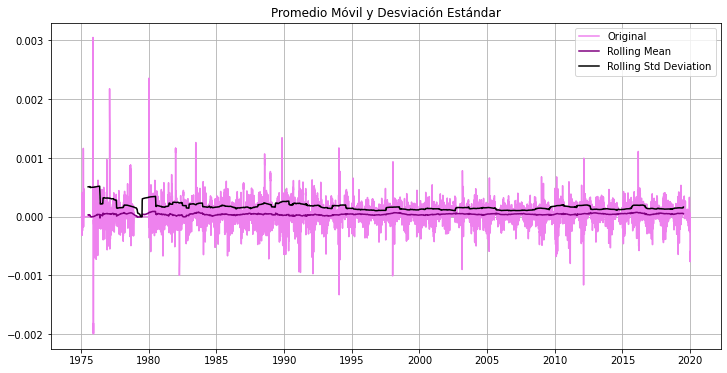

Prueba de Dickey-Fuller:
Test Statistic                -1.370332e+01
p-value                        1.277521e-25
#Lags Used                     4.300000e+01
Number of Observations Used    1.638500e+04
Critical Value (1%)           -3.430749e+00
Critical Value (5%)           -2.861716e+00
Critical Value (10%)          -2.566864e+00
dtype: float64


In [42]:
#Ffunción .shift() 
#7 días

ts_slogtest=ts_logtest.shift(periods=7)

ts_sdlogtest=ts_logtest-ts_slogtest
print(ts_slogtest.head(10))

ts_sdlogtest.dropna(inplace=True)
test_stationarity(ts_sdlogtest)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


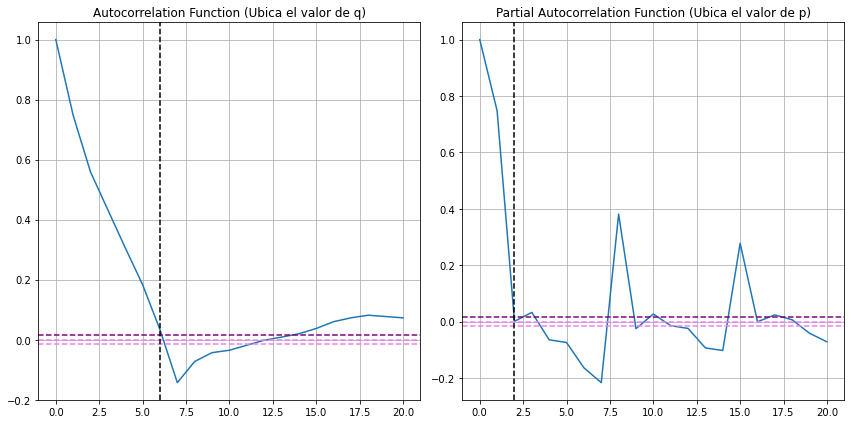

In [43]:
#Modelo Arima

#Obteniendo los valores de p y q (usando a d como 1):
lag_acf = acf(ts_sdlogtest, nlags=20)
lag_pacf = pacf(ts_sdlogtest, nlags=20, method = 'ols')

plt.rcParams["figure.figsize"] = (12,6)

#Gráfica de ACF (Autocorrelation Function)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='violet')
plt.axhline(y=-1.96/np.sqrt(len(ts_sdlogtest)), linestyle='--', color='violet')
plt.axhline(y=1.96/np.sqrt(len(ts_sdlogtest)), linestyle='--', color='purple')
# Graficamos unas líneas verticales como referencias
plt.axvline(x=6, linestyle='--', color='black')
plt.grid()
plt.title('Autocorrelation Function (Ubica el valor de q)')

#Gráfica de PACF (Partial Autocorrelation Function)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='violet')
plt.axhline(y=-1.96/np.sqrt(len(ts_sdlogtest)), linestyle='--', color='violet')
plt.axhline(y=1.96/np.sqrt(len(ts_sdlogtest)), linestyle='--', color='purple')
# Graficamos unas líneas verticales como referencias 
plt.axvline(x=2, linestyle='--', color='black')
plt.grid()
plt.title('Partial Autocorrelation Function (Ubica el valor de p)')

plt.tight_layout()

Observación: q approx 6, entonces q=6 y p=2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                16428
Model:                 ARIMA(2, 1, 0)   Log Likelihood              123639.190
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 25 Feb 2021   AIC                        -247270.379
Time:                        07:46:24   BIC                        -247239.552
Sample:                    01-09-1975   HQIC                       -247260.197
                         - 12-31-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.621e-08   7.91e-07     -0.046      0.963   -1.59e-06    1.51e-06
ar.L1.D.value    -0.1455      0.008    -18.836      0.000      -0.161      -0.130
ar.L2.D.value    -0.1410      0.008    -

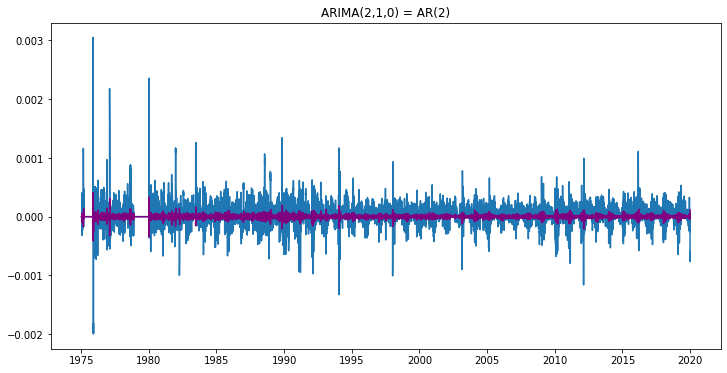

In [44]:
#Modelo AR(p): (p,d,q) = (2,1,0) 
model = ARIMA(ts_sdlogtest, order=(2,1,0), missing='drop')
results_AR = model.fit(displ=-1)
plt.plot(ts_sdlogtest)
plt.plot(results_AR.fittedvalues, color='purple')
plt.title('ARIMA(2,1,0) = AR(2)')
print(results_AR.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                16428
Model:                 ARIMA(0, 1, 6)   Log Likelihood              123420.287
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 25 Feb 2021   AIC                        -246824.574
Time:                        07:46:28   BIC                        -246762.920
Sample:                    01-09-1975   HQIC                       -246804.209
                         - 12-31-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.621e-08   7.99e-07     -0.045      0.964    -1.6e-06    1.53e-06
ma.L1.D.value    -0.1534        nan        nan        nan         nan         nan
ma.L2.D.value    -0.1473        nan     

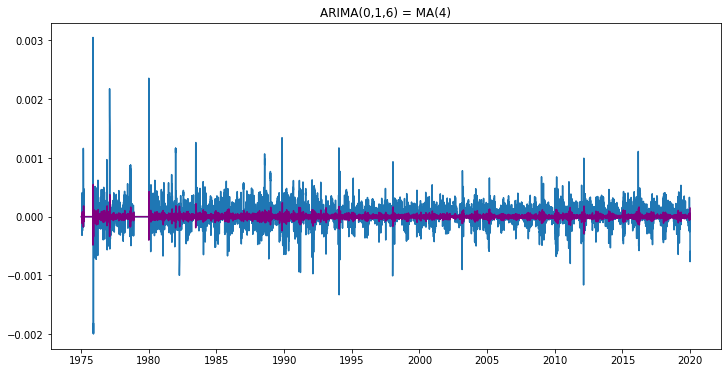

In [45]:
#Modelo MA(q): (p,d,q) = (0,1,6) 
model = ARIMA(ts_sdlogtest, order=(0,1,6), missing='drop')
results_MA = model.fit(displ=-1)
plt.plot(ts_sdlogtest)
plt.plot(results_MA.fittedvalues, color='purple')
plt.title('ARIMA(0,1,6) = MA(4)')
print(results_MA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                16428
Model:                 ARIMA(2, 1, 6)   Log Likelihood              123701.758
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 25 Feb 2021   AIC                        -247383.516
Time:                        07:46:42   BIC                        -247306.449
Sample:                    01-09-1975   HQIC                       -247358.060
                         - 12-31-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.348e-08   6.06e-07     -0.055      0.956   -1.22e-06    1.15e-06
ar.L1.D.value    -0.1442        nan        nan        nan         nan         nan
ar.L2.D.value    -0.1241        nan     

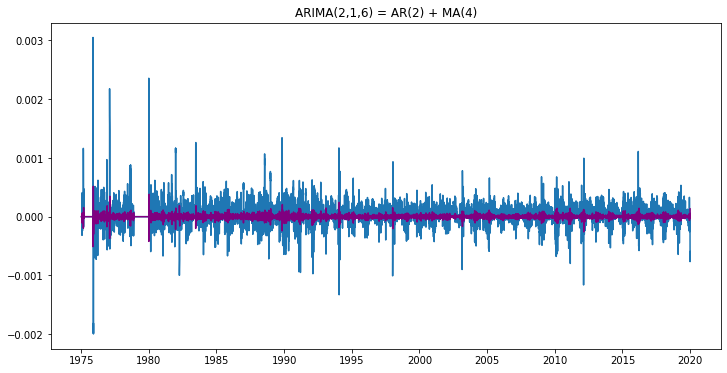

In [46]:
#Modelo ARIMA(p): (p,d,q) = (2,1,6) 
model = ARIMA(ts_sdlogtest, order=(2,1,6), missing='drop')
results_ARIMA = model.fit(displ=-1)
plt.plot(ts_sdlogtest)
plt.plot(results_ARIMA.fittedvalues, color='purple')
plt.title('ARIMA(2,1,6) = AR(2) + MA(4)')
print(results_ARIMA.summary())

Observación: Analizando los previos resultados, podemos concluir que el modelo ARIMA es el más apropiado al tener el valor menor de AIC.

Date
1975-01-09   -3.347625e-08
1975-01-10   -3.772799e-08
1975-01-11   -4.350679e-08
1975-01-12   -4.656588e-08
1975-01-13   -4.939827e-08
                  ...     
2019-12-27   -3.103523e-05
2019-12-28   -1.650583e-05
2019-12-29   -9.557742e-06
2019-12-30    5.760138e-05
2019-12-31    1.330485e-04
Length: 16428, dtype: float64
Date
1975-01-01   NaN
1975-01-02   NaN
1975-01-03   NaN
1975-01-04   NaN
1975-01-05   NaN
dtype: float64
Date
2019-12-27    2.611756
2019-12-28    2.611707
2019-12-29    2.611395
2019-12-30    2.611154
2019-12-31    2.611400
dtype: float64


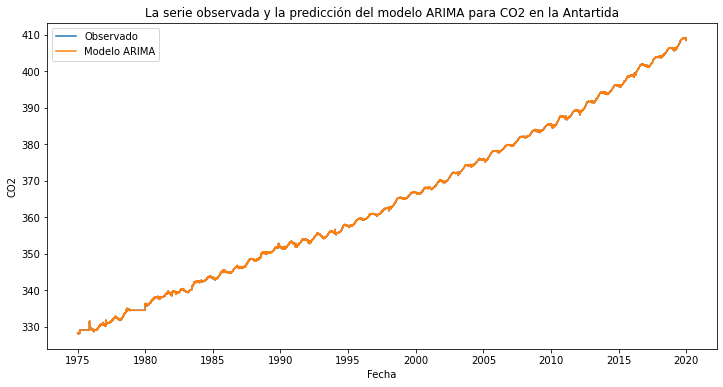

In [47]:
#Escala original
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

predictions_ARIMA_log = pd.Series(ts_logtest, index = ts_logtest.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff)
print(predictions_ARIMA_log.head())
print(predictions_ARIMA_log.tail())

#Escala de Temperatura original 
predictions_ARIMA = 10**(predictions_ARIMA_log)
#Gráfica la serie original y las predicciones con ARIMA

plt.rcParams["figure.figsize"] = (12,6)

plt.plot(ts_test, label='Observado');
plt.plot(predictions_ARIMA, label='Modelo ARIMA');
plt.xlabel('Fecha')
plt.ylabel('CO2')
plt.title('La serie observada y la predicción del modelo ARIMA para CO2 en la Antartida')
plt.legend(loc='best');

RMSE: 0.024689440093028883


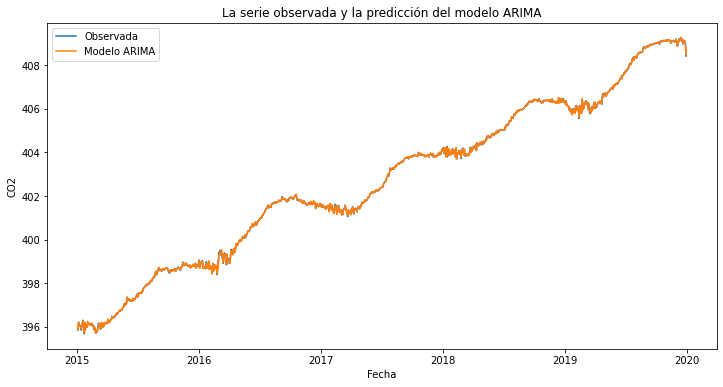

In [48]:
#Cálculo el RMSE (Root Mean Square Error - Error de la Raiz Cuadrada de la Media)

RMSE = np.sqrt(np.mean((predictions_ARIMA - ts_test)**2))
print('RMSE:', RMSE)

#Gráfica de los útimos datos de las series 
ts_inftest = ts_test.tail(1825)
predictions_ARIMA_last = predictions_ARIMA.tail(1825)
plt.plot(ts_inftest, label='Observada');
plt.plot(predictions_ARIMA_last, label='Modelo ARIMA');
plt.xlabel('Fecha')
plt.ylabel('CO2')
plt.title('La serie observada y la predicción del modelo ARIMA')
plt.legend(loc='best');
